# NuScenes Sample-wise Data Transformation

In [0]:
#--------------------------------------------------------------------------------------------------------------
# !pip install nuscenes-devkit
# !pip install mask-rcnn
#--------------------------------------------------------------------------------------------------------------

In [1]:
#--------------------------------------------------------------------------------------------------------------
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud, Box
import pandas as pd
import numpy as np
import glob
import cv2
import os

DATAROOT = "./drive/My Drive/v1.0-mini"
nuscenes = NuScenes('v1.0-mini', dataroot=DATAROOT, verbose=True)
#--------------------------------------------------------------------------------------------------------------

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 7.2 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
#--------------------------------------------------------------------------------------------------------------
my_sample = nuscenes.sample[403]
#nuscenes.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')
my_sample['data']
#--------------------------------------------------------------------------------------------------------------

{'CAM_BACK': 'ae1cee7e46fe414bb25519d6ae31c8af',
 'CAM_BACK_LEFT': '8fdaff77e2de4d8ba21392e9b7d840ef',
 'CAM_BACK_RIGHT': 'f253e8760cb0441fbeade8f4e0ba7b11',
 'CAM_FRONT': '445dcd95cebc4c21b3e6a929fd2297bc',
 'CAM_FRONT_LEFT': '8a87b74c6f8c46d49b73e96dd6d5f263',
 'CAM_FRONT_RIGHT': '62f2f587354b4f0fa8954447394a0df4',
 'LIDAR_TOP': 'e7d9eec0e14a4a25beffd451517b520e',
 'RADAR_BACK_LEFT': '6f06273d87a341029731c0db79e548bb',
 'RADAR_BACK_RIGHT': '52d122035860407387effc3e39c5aa62',
 'RADAR_FRONT': 'eaf239f22ed44bb1a097f85a5ff8da2e',
 'RADAR_FRONT_LEFT': 'd68d81258f6042bba51683f00490c428',
 'RADAR_FRONT_RIGHT': '4972971b75564817be10230af5d0d5b1'}

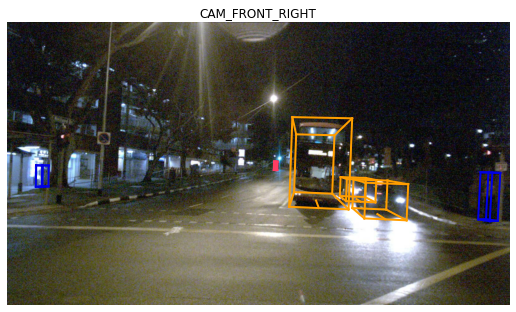

In [6]:
#--------------------------------------------------------------------------------------------------------------
sensor = 'CAM_FRONT_RIGHT'
cam_front_data = nuscenes.get('sample_data', my_sample['data'][sensor])
cam_front_data
nuscenes.render_sample_data(cam_front_data['token'])
#--------------------------------------------------------------------------------------------------------------

In [3]:
#--------------------------------------------------------------------------------------------------------------
sample_index = 0
final_data = []
#--------------------------------------------------------------------------------------------------------------
for indx in range(0,10):
  scene = nuscenes.scene[indx]
  print(scene['name'], ":", scene['nbr_samples'])

  first_sample_token = scene['first_sample_token']
  last_sample_token = scene['last_sample_token']

  my_sample = nuscenes.get('sample', first_sample_token)

  for sample_no in range(0, scene['nbr_samples']):
    #------------------------------------------------------------------------------------------
    # Cameras
    cam_front       = nuscenes.get('sample_data', my_sample['data']["CAM_FRONT"])['filename']
    cam_front_right = nuscenes.get('sample_data', my_sample['data']["CAM_FRONT_RIGHT"])['filename']
    cam_back_right  = nuscenes.get('sample_data', my_sample['data']["CAM_BACK_RIGHT"])['filename']
    cam_back        = nuscenes.get('sample_data', my_sample['data']["CAM_BACK"])['filename']
    cam_back_left   = nuscenes.get('sample_data', my_sample['data']["CAM_BACK_LEFT"])['filename']
    cam_front_left  = nuscenes.get('sample_data', my_sample['data']["CAM_FRONT_LEFT"])['filename']

    # Lidar
    lidar_top = nuscenes.get('sample_data', my_sample['data']["LIDAR_TOP"])['filename']

    # Radars
    radar_front       = nuscenes.get('sample_data', my_sample['data']["RADAR_FRONT"])['filename']
    radar_front_left  = nuscenes.get('sample_data', my_sample['data']["RADAR_FRONT_LEFT"])['filename']
    radar_front_right = nuscenes.get('sample_data', my_sample['data']["RADAR_FRONT_RIGHT"])['filename']
    radar_back_left   = nuscenes.get('sample_data', my_sample['data']["RADAR_BACK_LEFT"])['filename']
    radar_back_right  = nuscenes.get('sample_data', my_sample['data']["RADAR_BACK_RIGHT"])['filename']
    #------------------------------------------------------------------------------------------
    annotations_token_list =  my_sample['anns']
    #------------------------------------------------------------------------------------------
    '''
    #------------------------------------------------------------------------------------------
    # Creating single montage image
    inputImages = []
    outputImage = np.zeros((216, 384, 3), dtype='uint8')
    
    imagePaths = [cam_front_left, cam_front, cam_front_right, cam_back_left, cam_back, cam_back_right]
    for img in imagePaths:
      image=cv2.imread("./drive/My Drive/v1.0-mini/"+img)
      image=cv2.resize(image,(128,108))
      inputImages.append(image)

    outputImage [0:108, 0:128]     = inputImages[0]
    outputImage [0:108, 128:256]   = inputImages[1]
    outputImage [0:108, 256:384]   = inputImages[2]
    outputImage [108:216, 0:128]   = inputImages[3]
    outputImage [108:216, 128:256] = inputImages[4]
    outputImage [108:216, 256:384] = inputImages[5]'''

    savePath = "./drive/My Drive/v1.0-mini/samples/MONTAGE/"+str(scene['name'])+'_'+str(sample_no)+".jpg"
    #cv2.imwrite(savePath, outputImage, [cv2.IMWRITE_JPEG_QUALITY, 100])
    #cv2.imshow(outputImage)
    #------------------------------------------------------------------------------------------
    for anns_token in annotations_token_list:
      my_annotation_metadata = nuscenes.get('sample_annotation', anns_token)
            
      final_data.append([sample_index, lidar_top, 
                        radar_front, radar_front_left, 
                        radar_front_right,
                        radar_back_left, radar_back_right,
                        savePath,
                        my_annotation_metadata['size'], 
                        my_annotation_metadata['num_lidar_pts'], my_annotation_metadata['num_radar_pts'],
                        my_annotation_metadata['visibility_token'], my_annotation_metadata['category_name']])

      sample_index = sample_index + 1
      
    if (my_sample['next'] == '' ):
      break;

    my_sample = nuscenes.get('sample', my_sample['next'])
    
#--------------------------------------------------------------------------------------------------------------
print("Total Samples:", sample_index)
#--------------------------------------------------------------------------------------------------------------
'''datafile_ = pd.DataFrame(final_data)
datafile_.columns = ['index', 'lidar_top', 'radar_front', 'radar_front_left', 'radar_front_right',
                    'radar_back_left', 'radar_back_right',
                    'cam_front', 'cam_front_right', 'cam_back_right', 'cam_back', 'cam_back_left', 'cam_front_left',
                     'bbox_translation', 'bbox_size', 'bbox_quaternion', 'num_lidar_pts', 'num_radar_pts',
                     'visibility_token', 'category_name']
#datafile_.to_csv("Final_Data_1.csv", index = False)'''
#--------------------------------------------------------------------------------------------------------------
datafile_ = pd.DataFrame(final_data)
datafile_.columns = ['index', 'lidar_top', 'radar_front', 'radar_front_left', 'radar_front_right',
                    'radar_back_left', 'radar_back_right',
                    'montage_image', 'bbox_size', 'num_lidar_pts', 'num_radar_pts', 
                     'visibility_token', 'category_name']
datafile_.to_csv("Final_Data_2.csv", index = False)
#--------------------------------------------------------------------------------------------------------------

scene-0061 : 39
scene-0103 : 40
scene-0553 : 41
scene-0655 : 41
scene-0757 : 41
scene-0796 : 40
scene-0916 : 41
scene-1077 : 41
scene-1094 : 40
scene-1100 : 40
Total Samples: 18538


In [0]:
#--------------------------------------------------------------------------------------------------------------
# Grouping labels into generalised classes
#--------------------------------------------------------------------------------------------------------------
def labelChange(name):
  current_name = ""
  humanpeds = ["human.pedestrian.adult", "human.pedestrian.child", "human.pedestrian.construction_worker",
               "human.pedestrian.personal_mobility", "human.pedestrian.police_officer" ]
  
  smallobjects = ["movable_object.barrier", "movable_object.debris",
                  "movable_object.pushable_pullable", "movable_object.trafficcone", "static_object.bicycle_rack"]
  
  vehicle_small = ["vehicle.bicycle", "vehicle.car", "vehicle.motorcycle"]

  vehicle_big = ["vehicle.trailer", "vehicle.truck", "vehicle.bus.bendy", 
                 "vehicle.bus.rigid", "vehicle.construction"]
  if (name in humanpeds): 
      current_name = "pedestrains"
  if (name in smallobjects):
      current_name = "small_objects"
  if (name in vehicle_small):
      current_name = "vehicle.small"
  if (name in vehicle_big):
    current_name = "vehicle.big"
  if name == "human.pedestrian.adult":
    current_name = "pedestrains"
  return current_name
#--------------------------------------------------------------------------------------------------------------

In [0]:
#--------------------------------------------------------------------------------------------------------------
# original scene wise output
#--------------------------------------------------------------------------------------------------------------
sample_index = 0
final_data = []
#--------------------------------------------------------------------------------------------------------------
for indx in range(0,10):
  scene = nuscenes.scene[indx]
  print(scene['name'], ":", scene['nbr_samples'])

  first_sample_token = scene['first_sample_token']
  last_sample_token = scene['last_sample_token']

  my_sample = nuscenes.get('sample', first_sample_token)

  for sample_no in range(0, scene['nbr_samples']):

    # Cameras
    cam_front       = nuscenes.get('sample_data', my_sample['data']["CAM_FRONT"])['filename']
    cam_front_right = nuscenes.get('sample_data', my_sample['data']["CAM_FRONT_RIGHT"])['filename']
    cam_back_right  = nuscenes.get('sample_data', my_sample['data']["CAM_BACK_RIGHT"])['filename']
    cam_back        = nuscenes.get('sample_data', my_sample['data']["CAM_BACK"])['filename']
    cam_back_left   = nuscenes.get('sample_data', my_sample['data']["CAM_BACK_LEFT"])['filename']
    cam_front_left  = nuscenes.get('sample_data', my_sample['data']["CAM_FRONT_LEFT"])['filename']

    # Lidar
    lidar_top = nuscenes.get('sample_data', my_sample['data']["LIDAR_TOP"])['filename']

    # Radars
    radar_front       = nuscenes.get('sample_data', my_sample['data']["RADAR_FRONT"])['filename']
    radar_front_left  = nuscenes.get('sample_data', my_sample['data']["RADAR_FRONT_LEFT"])['filename']
    radar_front_right = nuscenes.get('sample_data', my_sample['data']["RADAR_FRONT_RIGHT"])['filename']
    radar_back_left   = nuscenes.get('sample_data', my_sample['data']["RADAR_BACK_LEFT"])['filename']
    radar_back_right  = nuscenes.get('sample_data', my_sample['data']["RADAR_BACK_RIGHT"])['filename']
    #------------------------------------------------------------------------------------------
    annotations_token_list =  my_sample['anns']
    #------------------------------------------------------------------------------------------
    '''    
    # Creating single montage image
    inputImages = []
    outputImage = np.zeros((216, 384, 3), dtype='uint8')
    
    imagePaths = [cam_front_left, cam_front, cam_front_right, cam_back_left, cam_back, cam_back_right]
    for img in imagePaths:
      image=cv2.imread("./drive/My Drive/v1.0-mini/"+img)
      image=cv2.resize(image,(128,108))
      inputImages.append(image)

    outputImage [0:108, 0:128]     = inputImages[0]
    outputImage [0:108, 128:256]   = inputImages[1]
    outputImage [0:108, 256:384]   = inputImages[2]
    outputImage [108:216, 0:128]   = inputImages[3]
    outputImage [108:216, 128:256] = inputImages[4]
    outputImage [108:216, 256:384] = inputImages[5]'''
    savePath = "./drive/My Drive/v1.0-mini/samples/MONTAGE/"+str(scene['name'])+'_'+str(sample_no)+".jpg"
    #cv2.imwrite(savePath, outputImage, [cv2.IMWRITE_JPEG_QUALITY, 100])
    #cv2.imshow(outputImage)
    #------------------------------------------------------------------------------------------
    d_size = []
    d_lidar_points = []
    d_radar_points = []
    d_visibility = []
    d_category = []
    for anns_token in annotations_token_list:
      my_annotation_metadata = nuscenes.get('sample_annotation', anns_token)
      d_size.append(my_annotation_metadata['size'])
      d_lidar_points.append(my_annotation_metadata['num_lidar_pts'])
      d_radar_points.append(my_annotation_metadata['num_radar_pts'])
      d_visibility.append(my_annotation_metadata['visibility_token'])
      d_category.append(labelChange(my_annotation_metadata['category_name']))

      #sample_index = sample_index + 1
    final_data.append([(str(scene['name'])+'_'+str(sample_no)), lidar_top, 
                        radar_front, radar_front_left, 
                        radar_front_right,
                        radar_back_left, radar_back_right,
                        savePath, d_size, d_lidar_points, d_radar_points,
                        d_visibility, d_category])

    if (my_sample['next'] == '' ):
      break;

    my_sample = nuscenes.get('sample', my_sample['next'])

#--------------------------------------------------------------------------------------------------------------
datafile_ = pd.DataFrame(final_data)
datafile_.columns = ['index', 'lidar_top', 'radar_front', 'radar_front_left', 'radar_front_right',
                    'radar_back_left', 'radar_back_right',
                    'montage_image', 'bbox_size', 'num_lidar_pts', 'num_radar_pts', 
                     'visibility_token', 'category_name']
datafile_.to_csv("Final_Sample_Wise.csv", index = False)
#--------------------------------------------------------------------------------------------------------------